########################FDS/IDS Assignment: Predicting Cardiac Diseases in Children########################

1: Analyzing the raw data

First of all let's take a look at the Data dictionary of the dataset that will be used in this assignment and describe each variable according to their type.




| VARIABLE | DESCRIPTION | TYPE |
|-----------|-------------|------|
| ID | Anonymized patient ID | Categorical (Nominal)¹ |
| Peso | Patient weight | Quantitative (Continuous)² |
| Altura | Patient height | Quantitative (Continuous)³ |
| IMC body | Mass index | Quantitative (Continuous)⁴ |
| Atendimento | Date of visit | Quantitative (Continuous)⁵ |
| DN | Birth date | Quantitative (Continuous)⁶ |
| IDADE | Age | Quantitative (Continuous)⁷ |
| Convenio | Health care insurance | Categorical (Nominal)⁸ |
| PULSOS | Pulses | Categorical (Nominal)⁹ |
| PA SISTOLICA | Systolic blood pressure | Quantitative (Continuous)¹⁰ |
| PA DIASTOLICA | Diastolic blood pressure | Quantitative (Continuous)¹¹ |
| PPA | Result SBP/DBP | Categorical (Nominal)¹² |
| NORMAL x ANORMAL | Absence or presence of pathology | Categorical (Binary)¹³ |
| B2 | Type of the second heart sound | Categorical (Nominal)¹⁴ |
| SOPRO | Murmur type | Categorical (Binary)¹⁵ |
| FC | Cardiac frequency | Quantitative (Continuous)¹⁶ |
| HDA1 | History of disease 1 | Categorical (Nominal)¹⁷ |
| HDA2 | History of disease 2 (other history) | Categorical (Nominal)¹⁸ |
| SEXO | Patient gender | Categorical (Binary)¹⁹ |
| MOTIVO1 | First reason for being forwarded to the cardiology clinic | Categorical (Nominal)²⁰|
| MOTIVO2 | Second reason for being forwarded to the cardiology clinic | Categorical (Nominal)²¹ |



01. ID: Ids are unique for each patient and do not hold any value for this data analysis.
02. Peso: Weight is a quantitative non-zero variable.
03. Altura: Same as Peso, Height is a quantitative non-zero variable. 
04. IMC: BMI can be calculated by the following formula weight(kg)/height(m)².
05. Atendimento: The date in which the patient visited the hospital, can be ordered.
06. DN: Date of birth, can be useful to cross-check age, same as Atendimento, can be ordered.
07. IDADE: Age, for the same reasons stated in DN.
08. Convenio: Health insurance, categorical and non sortable.
09. PULSOS: Pulses, classified in categories.
10. PA SISTOLICA: Systolic blood pressure, classified as a numerical value.
11. PA DISTOLICA: Diastolic blood pressure, classified as a numerical value.
12. PPA: Result SBP/DBP, classified in categories, if missing can be calculated based on other attributes.
13. NORMAL X ANORMAL: Absence or presence of pathology, can be normal or abnormal.
14. B2: Type of the second heart sound, classified as a categorical value.
15. SOPRO: Murmur type, classified as a categorical value.
16. FC: Cardiac frequency, classified as a non zero value.
17. HDA1: History of disease, classified as a categorical value.
18. HDA2: Second history of disease, same as HDA1.
19. SEXO: Gender, binary.
20. MOTIVO1:Categorical, classified in 7 different types
21. MOTIVO2: Categorical, same as MOTIVO1

2. Preliminary analysis.


In order to understand better the raw data presented, the following preliminary analysis were made:

1. Histograms (Frequency Distributions):

    Shows how frequently values occur for each numeric attribute.



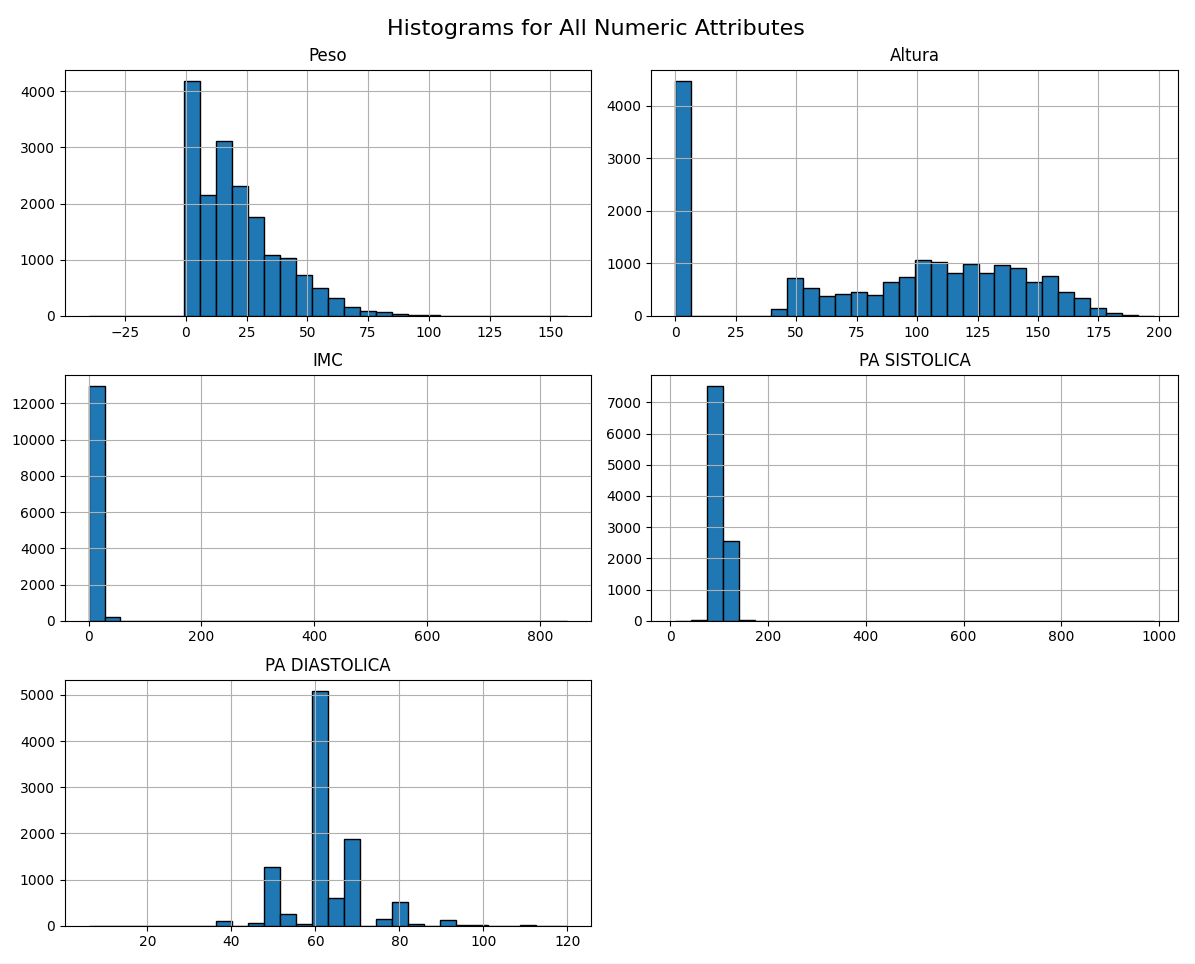

* **Peso (Weight):** The histogram shows a strong right skew — many low values and few very large ones. This suggests most entries cluster at low weights with a few extreme outliers.
* **Altura (Height):** The values are distributed more widely, with a plateau-like region between roughly 50 and 150. This indicates multiple common value ranges. Also, there is a significant of 0 values, which suggests missing values.
* **IMC (BMI):** Most data points are concentrated at very low values, with a few extremely high ones pushing the axis scale far to the right, making this analysis not useful.
* **PA Sistólica (Systolic BP)** and **PA Diastólica (Diastolic BP):** Both show that most observations lie in a narrow, realistic range, but there are rare extreme cases extending up to very high values (e.g., near 1000 for systolic).

* Overall, histograms make the **data concentration and outliers** immediately visible.


2. Density Plots (Probability Distributions)

   These show smoothed versions of the histograms — continuous curves estimating the probability density of the data.


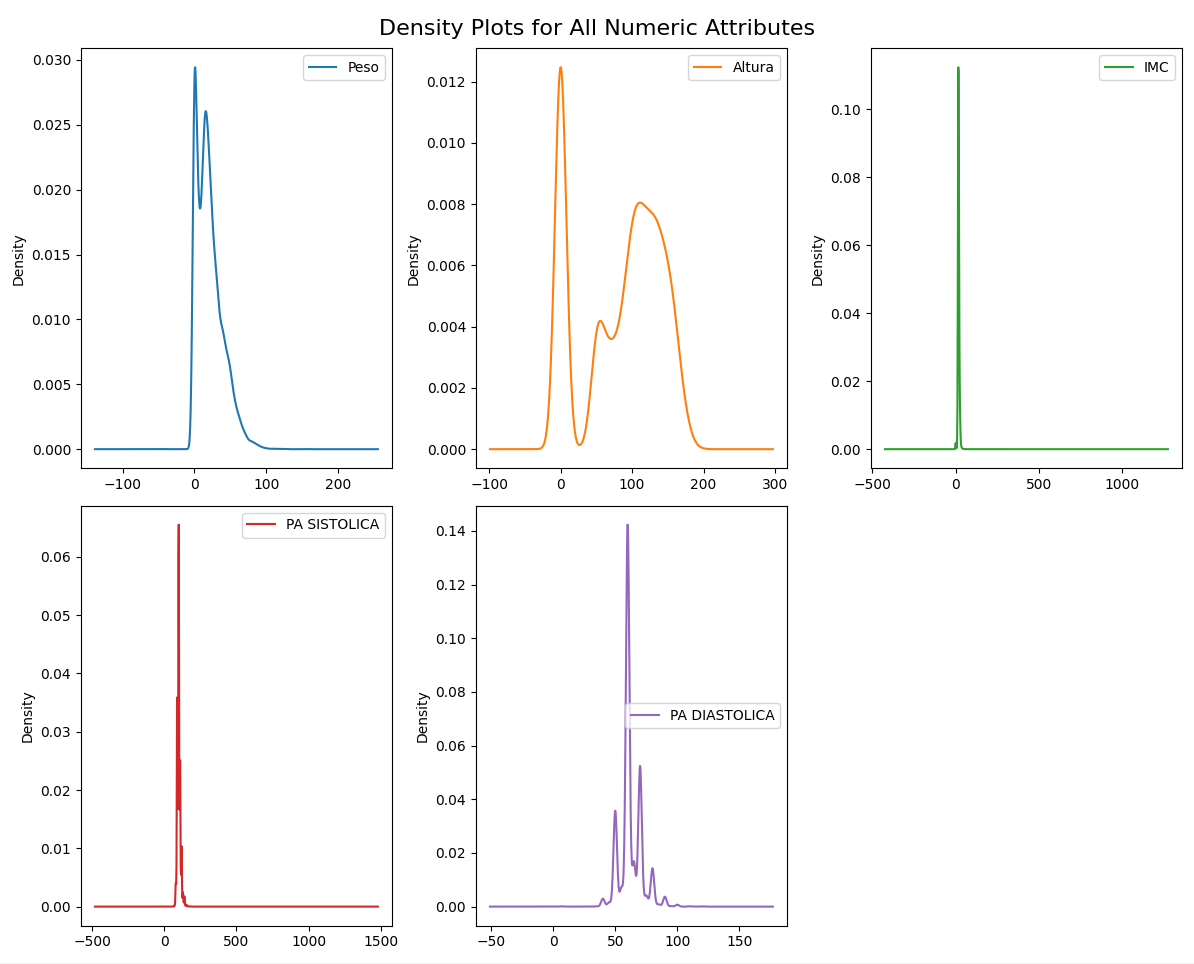

* The sharp peaks observed, particularly in **IMC** and **PA SISTOLICA**, indicate that most values fall within a very tight interval, while the long flat tails confirm the presence of extreme outliers stretching the x-axis.
* **Altura** shows multiple humps — suggesting multimodality (potentially different subgroups or measurement ranges).
* **Peso** and **PA DIASTOLICA** display narrow peaks near their mean values, meaning low variability among most observations.


Density plots help visualize the **shape and smoothness** of distributions — even when histograms look blocky.

3. Spread Measures (Descriptive Statistics Table)

| Atributo       |   mean    |    std     |  min  |  25%  |  50%  |  75%  |  max  | range |
|-----------------|-----------|------------|-------|-------|-------|-------|-------|--------|
| Peso            | 21.163520 | 18.061021  | -40.0 |  6.6  | 18.0  | 31.0  | 157.0 | 197.0  |
| Altura          | 83.865216 | 56.583610  |  0.0  | 36.0  | 99.0  |130.0  | 198.0 | 198.0  |
| IMC             | 17.806329 | 12.071950  |  0.0  | 15.0  | 17.0  | 19.0  | 848.0 | 848.0  |
| PA SISTOLICA    |101.314108 | 15.510066  | 10.0  | 90.0  |100.0  |110.0  | 990.0 | 980.0  |
| PA DIASTOLICA   | 62.303661 |  8.885555  |  6.0  | 60.0  | 60.0  | 70.0  | 120.0 | 114.0  |


* **IMC** (max = 848) and **PA SISTOLICA** (max = 990) show sharp peaks, indicating that the vast majority of values cluster within a very tight interval close to the mean. However, the long, flat tails, driven by the extreme maximum values, confirm the presence of severe outliers that heavily distort the measures of dispersion (STD and range).

* **Altura** displays a wide standard deviation (56.6) and suggests multimodality (multiple peaks). This implies the existence of distinct subgroups within the data or the inclusion of different measurement ranges (possibly missing/coded data near zero).

* **Peso** and **PA DIASTÓLICA** demonstrate narrow peaks close to their means, with Diastolic BP showing the lowest relative variability. This means most observations are strongly clustered, although Weight's range still hints at the presence of a few less extreme outliers.

4. Boxplot Interpretation

Boxplots show the five-number summary: minimum, first quartile, median, third quartile, and maximum. Points outside the whiskers are considered **outliers**.

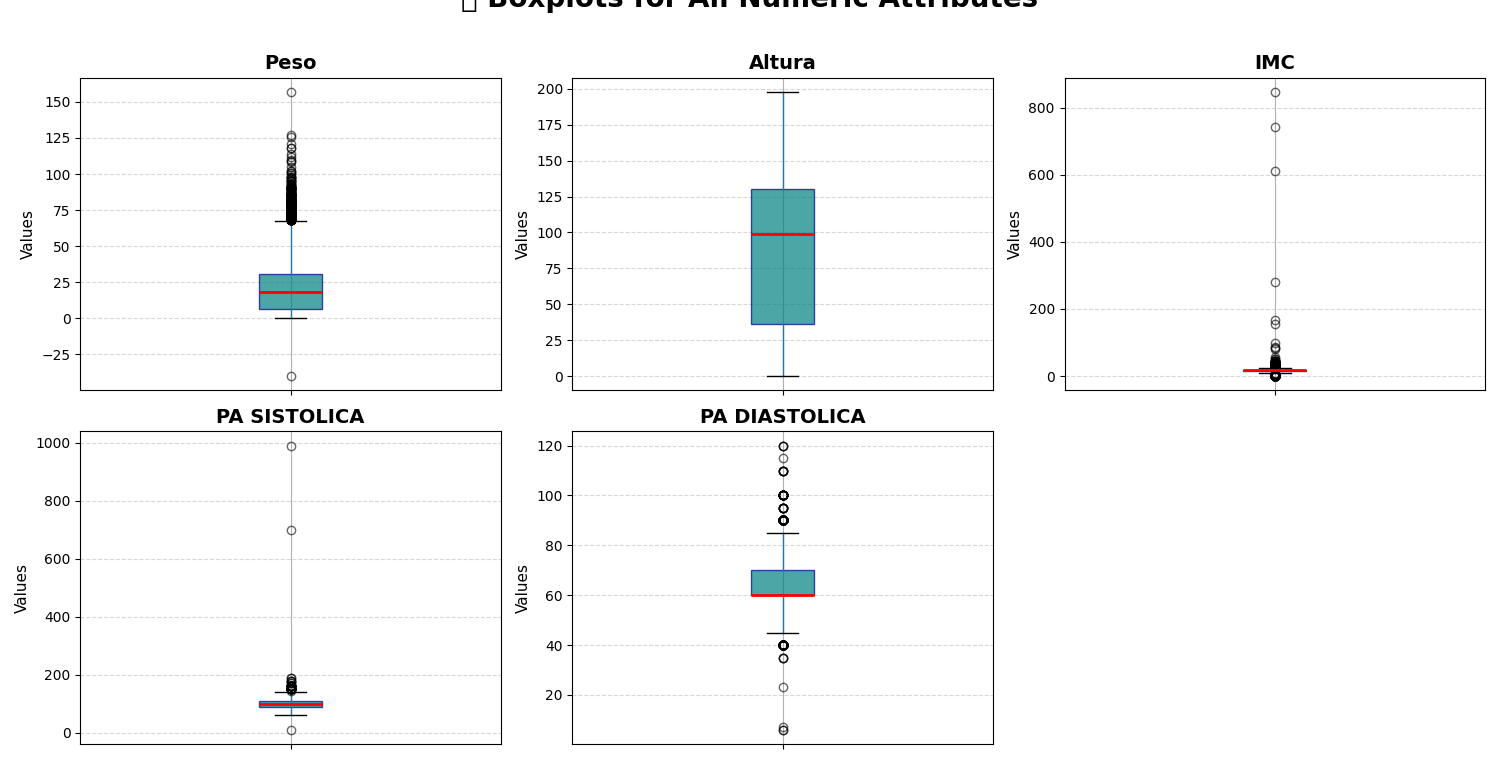

 
* **Peso** suffers from a severe data quality issue. While the core data is tightly centered, the distribution is ruined by a large number of outliers at both tails, critically including impossible negative values, pointing directly to significant measurement or data entry errors.

* **Altura** shows its main body of data is narrow, but is plagued by numerous outliers. These outliers stretch close to zero (suggesting missing data or physical impossibilities) and extend to extremely high values, confirming significant inaccuracies in the dataset.

* **IMC** is highly concentrated toward the low end, indicating a relatively small spread for the majority of observations. However, the plot is dominated by a few unrealistically high outliers that drastically skew the overall range and standard deviation.

* **PA SISTÓLICA** is centered within a realistic physiological range, but its reliability is compromised by the presence of extreme high outliers (some approaching 1000). This unequivocally confirms the existence of severe data entry errors in this attribute.

* **PA DIASTÓLICA** stands out as the most consistent distribution. It shows a narrow central box and only a few moderate high outliers. This attribute is generally reliable, requiring minimal review or only mild, standard outlier trimming.

2. Preprocessed Data

Main Changes Needed in the Raw Data:

* **PESO** There are negative values and others unreasonably high concerning in the PESO attribute, all of which are prejudicial to the proper analysis of the dataset. In order to solve this inconsistency, as a first step, the PESO values with absurd values will be refactured using the BMI and Height, if either of these values are missing or the resulting Weight calculated is unreasonable the PESO attribute will be set to Nan.

* **ALTURA** The height, as it is, is also problematic, even more than PESO. The abundancy of near zero values, due to the data pertaining mostly to newborns, is unreliable and skews the whole ALTURA column towards 0. As a rule of thumb, patients with less than 2 years will be desconsidered for the data analysis and the same refactoring and discarding approach used in PESO will be taken.

* **IMC** BMIs that do not fall within the range of 10 and 60 will be discarded, as they are unrealistic. The refactoring proccess used previously will be also applied in IMC.

* **PA SISTOLICA and PA DIASTOLICA** Taking into account normal blood pressure levels for boys and girls from the age of 2 to 18 only values within the following ranges will be used for PA SISTOLICA and PA DIASTOLICA, respectively ,50 < PAS < 250 30 < PAD < 150.

Further changes:

* **AGE** Ages lower than two are already being disconsidered, so taking into account the target scope of the analysis, that is, kids and teens, patient entries with age greater than 19 will also be discarded.
 
* **Unit Inconsistencies Check** The range of ALTURA 0 to 198  and PESO –40 to 157 suggests mixed measurement units, for example, cm vs. m, kg vs. g. To ensure data consistency, all measurements will use the same units and will be converted if necessary.

* **Verify Data Type Consistency** To ensure all numeric columns are actually numeric float or int.  sometimes Excel imports numbers as strings with commas or spaces.

##### /////////GRAPHS DONE, WILL ADD LATER